# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 2: Clasificación

__Número de grupo: 17__

__Nombres de los estudiantes: David del Cerro Domínguez y Sergio Ramos Mesa__

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [1]:
RANDOM_STATE = 83

import pandas as pd
import numpy as np

df = pd.read_csv('cleveland.csv')

##### Variables Categoricas #####

df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')

#########-----------------#########
df = df.dropna(axis=0)
#Cambiamos valores a normal y enfermo
df['target'] = np.where(df['target'] > 0,"enfermo","normal")
#------------------------------------#

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,enfermo


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

In [3]:
##Descripción del dataframe##
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


In [4]:
#Coeficientes de relación de Pearson
correl = df.corr(method='pearson')
correl

,age,trestbps,chol,thalach,oldpeak,ca
age,1.000000,0.290476,0.202644,-0.394563,0.197123,0.362210
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243,0.097954
chol,0.202644,0.131536,1.000000,-0.000075,0.038596,0.115945
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640,-0.268727
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000,0.294452
ca,0.362210,0.097954,0.115945,-0.268727,0.294452,1.000000


Fijandonos en la tabla de los coeficientes de relación de Pearson, podemos encontrar alguna relación entre variables como:

Age y thalach : El coeficiente de Pearson es -0.3945, lo que indica que existe una relación inversamenta proporcional no muy fuerte aunque si notable entre la edad de un sujeto y el máximo de pulsaciones por minuto que ese sujeto alcanza.

Age y ca : Coeficiente de relación de Pearson de 0.36, nos indica una relación proporcional entre la edad y el número de vasos coloreados.

Thalach y oldpeak: El coeficiente de Pearson entre estas dos variables es de -0.34, nos indica una relación proporcial inversa entre el máximo numero de pulsaciones por minuto y la bajada del ST inducida por el ejercicio respecto al reposo.

Estas relaciones tambíen se pueden confirmar observando el siguiente gráfica, donde se observa que las  relaciones explicadas tienen un grafico donde existe una relación entre la X y la Y.

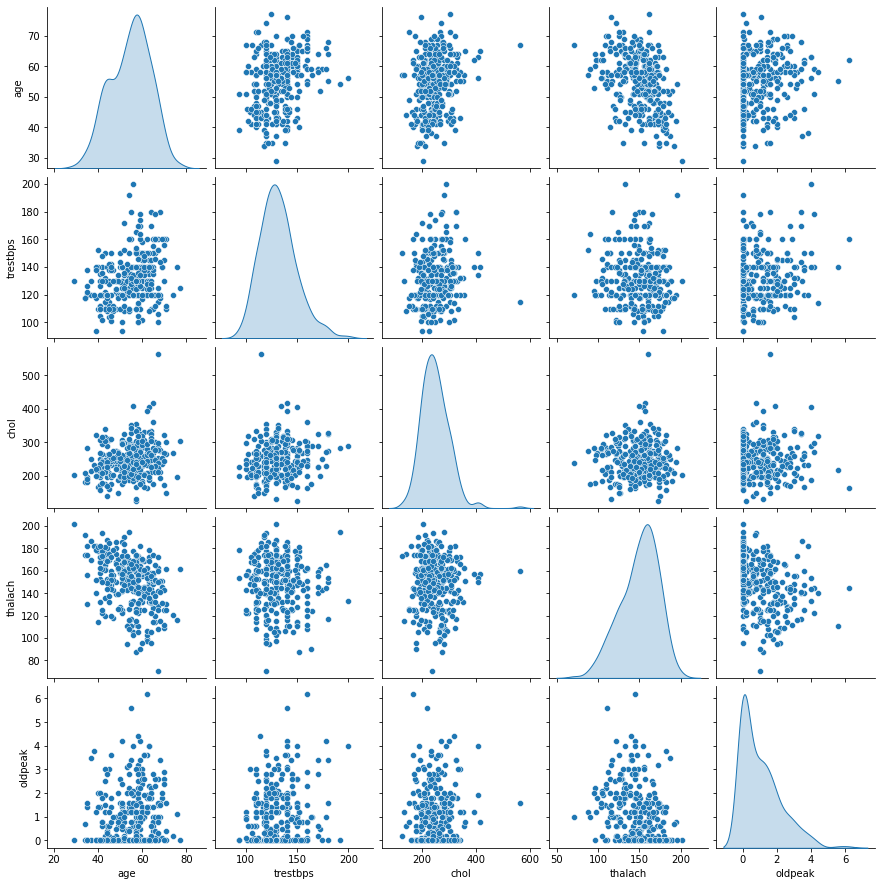

In [4]:
import seaborn as sns
df1 = df.loc[:,['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(df1,diag_kind='kde')

<AxesSubplot:ylabel='target'>

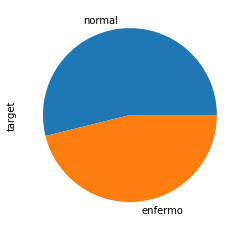

In [4]:
df['target'].value_counts().plot.pie()

Como podemos en el diagrama anterior, tenemos prácticamente el mismo numero de ejemplos de gente enferme y gente sin estar enferma, por lo tanto las clases están equilibradas en principio.

------------------------------------------------------------------------------------------------------------------
El problema va a ser complejo de resolver de resolver, puesto que no existen unas grandes correlaciones que nos indique  que un paciente está enfermo. Como podemos ver en las siguientes descripciones, no existe una gran diferencia entre las clases de enfermo y normal.


In [6]:
df[df['target'] == 'normal'].describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,160.000000,160.00000,160.00000,160.000000,160.00000,160.000000
mean,52.643750,129.17500,243.49375,158.581250,0.59875,0.275000
std,9.551151,16.37399,53.75755,19.043304,0.78716,0.633945
min,29.000000,94.00000,126.00000,96.000000,0.00000,0.000000
25%,44.750000,120.00000,208.75000,149.000000,0.00000,0.000000
50%,52.000000,130.00000,235.50000,161.000000,0.20000,0.000000
75%,59.000000,140.00000,268.25000,172.000000,1.10000,0.000000
max,76.000000,180.00000,564.00000,202.000000,4.20000,3.000000


In [7]:
df[df['target'] == 'enfermo'].describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,56.759124,134.635036,251.854015,139.109489,1.589051,1.145985
std,7.899670,18.896730,49.679937,22.710673,1.305006,1.018506
min,35.000000,100.000000,131.000000,71.000000,0.000000,0.000000
25%,53.000000,120.000000,218.000000,125.000000,0.600000,0.000000
50%,58.000000,130.000000,253.000000,142.000000,1.400000,1.000000
75%,62.000000,145.000000,284.000000,157.000000,2.500000,2.000000
max,77.000000,200.000000,409.000000,195.000000,6.200000,3.000000


Lo que podemos observar en las diferencias de datos para los enfermos y los normales es una mayor edad media para los enfermos, menor valor de talach(maximas pulsaciones por minuto que alcanza una persona),relacionado con la edad. Tambien se aprecia un mayor valor de ca y de oldpeak. Posiblemente estas diferencias se apreciarán en el arbol.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

In [6]:
dfT = df['target']
dfD = df.drop('target',axis=1)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier, export_graphviz

train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 6)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(clf,dfD, dfT, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

train_accuracy, test_accuracy

([0.764682206942814,
  0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9139569008888143],
 [0.7404597701149426,
  0.7104597701149425,
  0.7906896551724139,
  0.7608045977011495,
  0.7571264367816093])

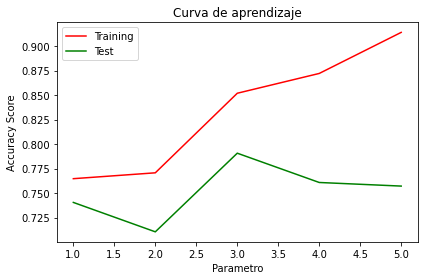

In [8]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

Como podemos observar en los datos obtenidos anteriormente, la mejor produndidad la podemos encontrar en 3, ya que es donde se maximiza el test_score y nos encontramos con un train_score elevado a su vez.

# 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

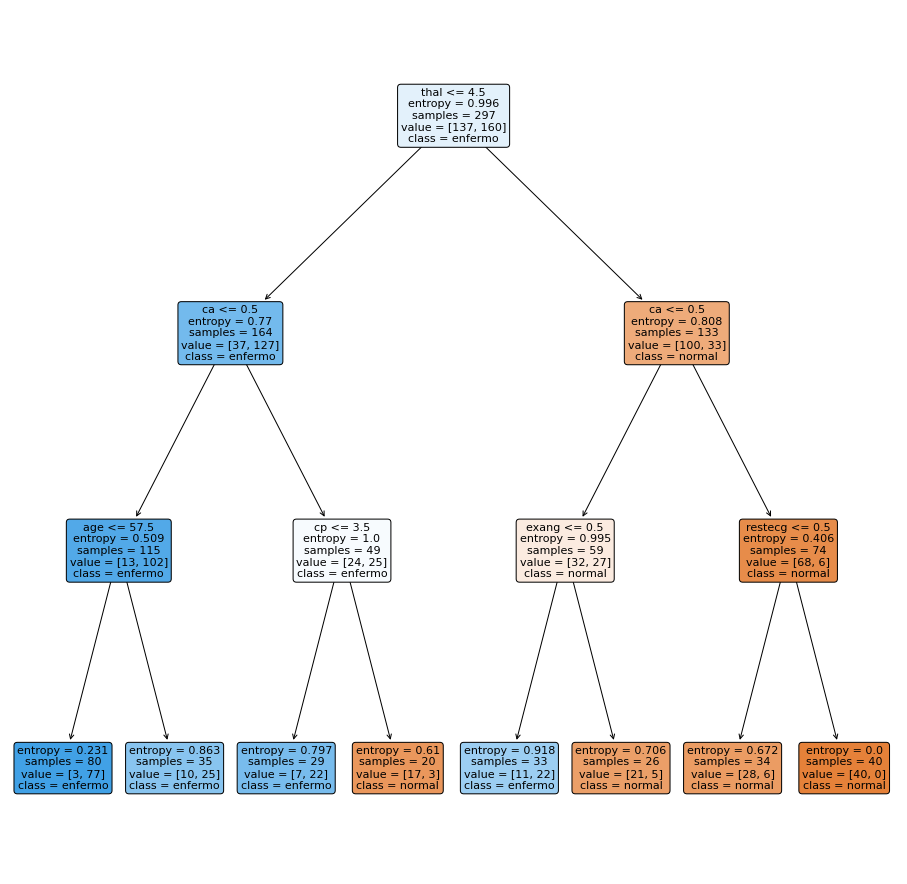

In [9]:
from sklearn.tree import plot_tree
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
clf1 = clf1.fit(dfD, dfT)

# Pintamos el árbol
plt.figure(figsize=(16,16))
plot_tree(clf1, filled=True, feature_names=dfD.columns, class_names=['normal','enfermo'], rounded=True)
plt.show()

- ¿Cuáles son las variables más importantes y en qué orden?

La variable más importante es 'thal', que  es un tipo de anemia del grupo de anemias hereditarias. Despúes nos encontramos con la variable 'ca' y despues con variables como la edad, dolor de pecho, el electrocardiograma de un paciente.

- ¿Hay variables del conjunto de datos que no se han usado? 
Ya que nos encontramos con un arbol de profundidad 3, hay bastantes variables que no se han utilizado como puede ser:
sex cp 	trestbps chol fbs oldpeak slope 

- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
Si hacemos una sola pregunta nos encontramos ante un árbol de profundidad 1, con lo obtenido en la búsqueda de la mejor profundidad tendriamos un test_score de 0.7404597701149426, con lo cual acertariamos un 74% de las veces.

- ¿El árbol que hemos construido es capaz de separar las clases?  No, ya que para muchas clases nos encontramos values relativamente cercanos entre normal y enfermos, a su vez la entropía es elevaada en la mayoría de nodos.


- ¿En cuál de los nodos hoja existe mayor confusión? El nodo con mayor confusión es aquel con mayor valor de la entropía. En este caso es el nodo cuyo valor de entropy es 0.918, donde hay 33 samples.

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [10]:
#Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, dfD, dfT, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.7759552874698066
Exhaustividad ponderada media:  0.7571264367816093
F1 ponderado media:  0.7498727425942319


Nuestro clasificador no es muy efectivo, ya que nos hayamos en un 0.78 de precisión, una exhaustividad ponderaada de 0.75 y una f1 de 0.75.

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
predictions = cross_val_predict(clf, dfD, dfT, cv=10)

# Informe por clases
cr = classification_report(dfT,predictions, target_names=['normal','enfermo'])
print(cr)

              precision    recall  f1-score   support

      normal       0.76      0.69      0.73       137
     enfermo       0.76      0.81      0.78       160

    accuracy                           0.76       297
   macro avg       0.76      0.75      0.75       297
weighted avg       0.76      0.76      0.76       297



Nuestro clasificador es mejor clasificando a los 'enfermos', que a la gente sin enfermedad, ya que tenemos un mayor recall y f1 score en la clase enfermo.

In [33]:
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(dfT, predictions, ['normal','enfermo'], normalize=None)

array([[130,  30],
       [ 42,  95]], dtype=int64)

A pesar de lo obtenido en el informe de cada clase, donde a priori, nuestro clasificador parecía que pudiera clasificar mejor a los enfermos, en la matriz de confusión podemos observar que realmente es lo contrario, donde se predice mejor a los normales que a los enfermos. 


--------------------------------------------------------------------------------------------------------------
La conclusion final es que no merece la pena usar este modelo, tiene poca precisión, no sería util en un sistema real de un hospital. Esto debido a que al menos con estos pocos datos, que a su vez son bastantes dispersos y que no existen  grandes correlaciones, lo que dificulta ajustar un árbol de decision para que funcione con una precisión elevada.

Igualmente, un modelo de este tipo, bien ajustado y con buena precisión, puede ser muy útil para detectar enfermedades con distintas pruebas, siendo un apoyo para los médicos.
